In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../scripts/')

Import packages

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

Initalize configs

In [6]:
pwd = Path().cwd()
root_dir = pwd.parent
data_dir = root_dir / "data"
file_path = data_dir / "clean_data.csv"

# sets global styling for graphs
plt.style.use('seaborn')

# to convert the scientific notation to decimal format
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# reset the decimal format back to scientific notation
# pd.reset_option('display.float_format')

In [13]:
# data = pd.read_csv(file_path, na_values=["undefined"], keep_default_na=True, parse_dates=["Start", "End"])
data = pd.read_csv(file_path, parse_dates=["Start", "End"], dtype={"IMSI": str, "MSISDN/Number": str, "IMEI": str, "Last Location Name": str})

In [14]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201448079117.0,33664962239.0,35521209507511.0,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200314458056.0,33760627129.0,35281510359387.0,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201402342131.0,33750343200.0,35356610164913.0,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201401415120.0,33699795932.0,35407009745539.0,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [15]:
data.shape

(148506, 55)

In [16]:
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social M

In [17]:
data_modified = data.copy()

In [18]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 148506 non-null  float64       
 1   Start                                     148506 non-null  datetime64[ns]
 2   Start ms                                  148506 non-null  float64       
 3   End                                       148506 non-null  datetime64[ns]
 4   End ms                                    148506 non-null  float64       
 5   Dur. (s)                                  148506 non-null  float64       
 6   IMSI                                      148506 non-null  object        
 7   MSISDN/Number                             148506 non-null  object        
 8   IMEI                                      148506 non-null  object        
 9   Last Location N

### Top 10 used handsets by customers

In [19]:
top_10_handsets = data_modified["Handset Type"].value_counts().nlargest(10)

In [20]:
top_10_handsets

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
Unknown                          8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: Handset Type, dtype: int64

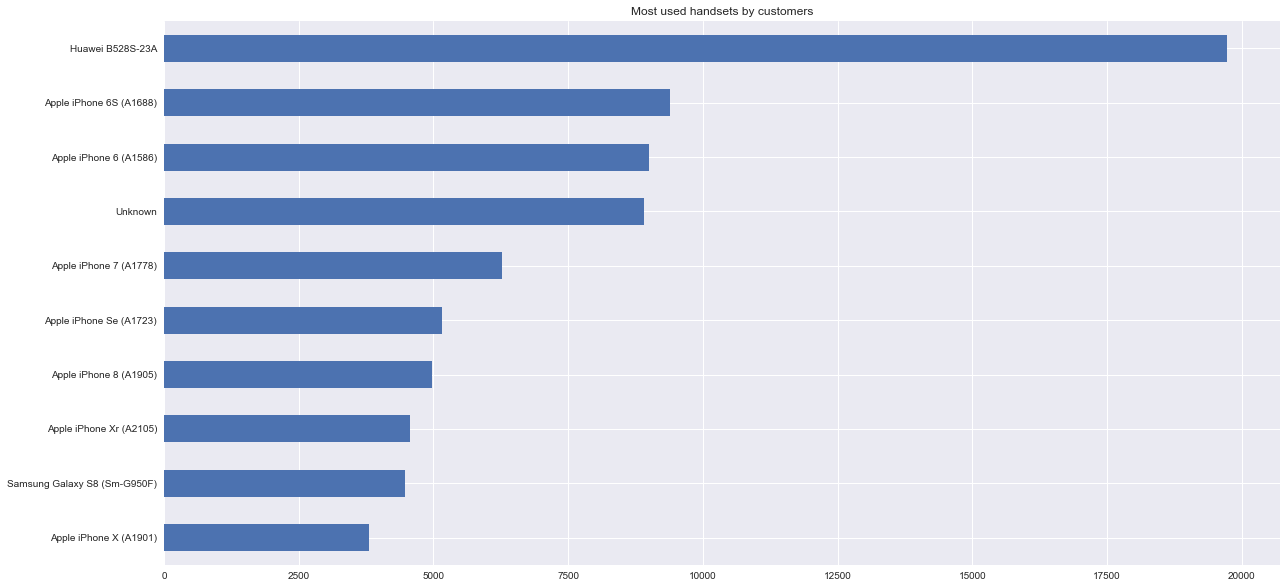

In [21]:
top_10_handsets.plot(kind="barh", figsize=(20, 10), title="Most used handsets by customers").invert_yaxis()

### Top 3 handset manufacturers

In [22]:
top_3_handset_manufacturers = data_modified["Handset Manufacturer"].value_counts().nlargest(3)

In [23]:
top_3_handset_manufacturers

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

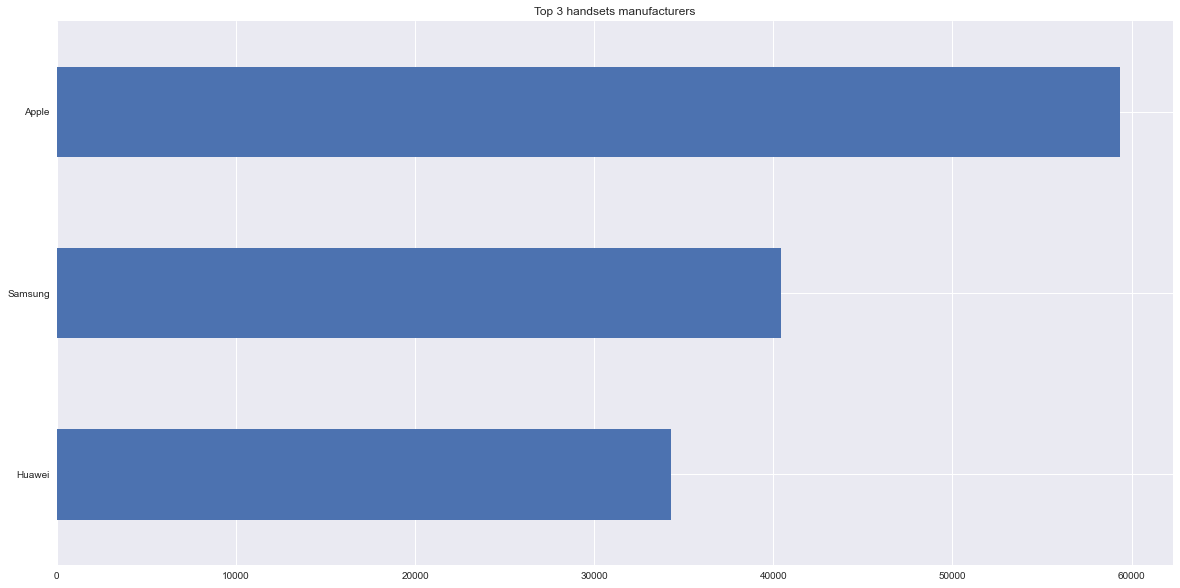

In [24]:
top_3_handset_manufacturers.plot(kind="barh", figsize=(20, 10), title="Top 3 handsets manufacturers").invert_yaxis()

### Top 5 Handsets Manufactured by Apple

In [25]:
top_5_apple_handsets = data_modified[data_modified["Handset Manufacturer"] == "Apple"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [26]:
top_5_apple_handsets

,Handset Manufacturer
Handset Type,
Apple iPhone 6S (A1688),9395
Apple iPhone 6 (A1586),8993
Apple iPhone 7 (A1778),6279
Apple iPhone Se (A1723),5165
Apple iPhone 8 (A1905),4977


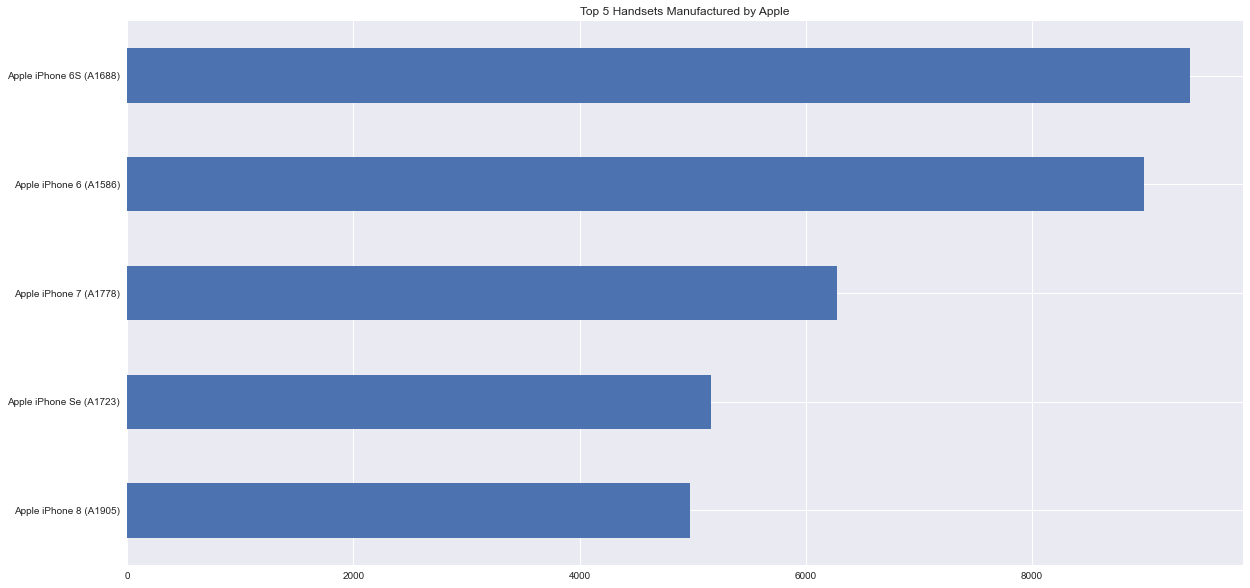

In [27]:
top_5_apple_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Apple", legend=False, xlabel="").invert_yaxis()

### Top 5 Handsets Manufactured by Samsung

In [28]:
top_5_samsung_handsets = data_modified[data_modified["Handset Manufacturer"] == "Samsung"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [29]:
top_5_samsung_handsets

,Handset Manufacturer
Handset Type,
Samsung Galaxy S8 (Sm-G950F),4464
Samsung Galaxy A5 Sm-A520F,3700
Samsung Galaxy J5 (Sm-J530),3675
Samsung Galaxy J3 (Sm-J330),3456
Samsung Galaxy S7 (Sm-G930X),3171


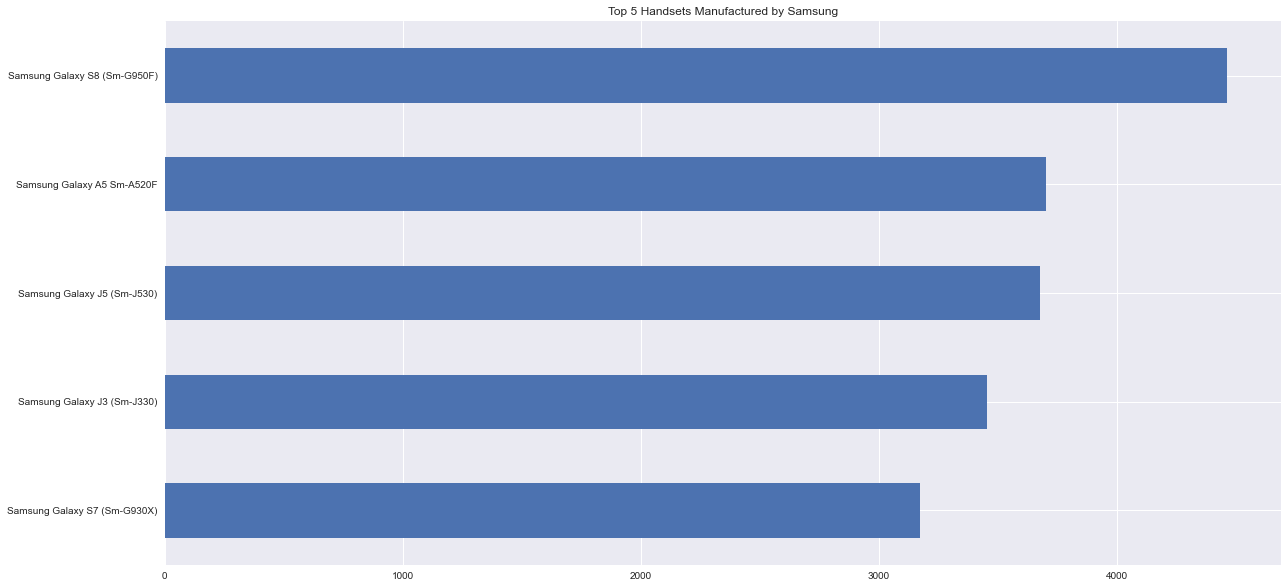

In [30]:
top_5_samsung_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Samsung", legend=False, xlabel="").invert_yaxis()

### Top 5 Handsets Manufactured by Huawei

In [31]:
top_5_huawei_handsets = data_modified[data_modified["Handset Manufacturer"] == "Huawei"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [32]:
top_5_huawei_handsets

,Handset Manufacturer
Handset Type,
Huawei B528S-23A,19727
Huawei E5180,2074
Huawei P20 Lite Huawei Nova 3E,2012
Huawei P20,1475
Huawei Y6 2018,996


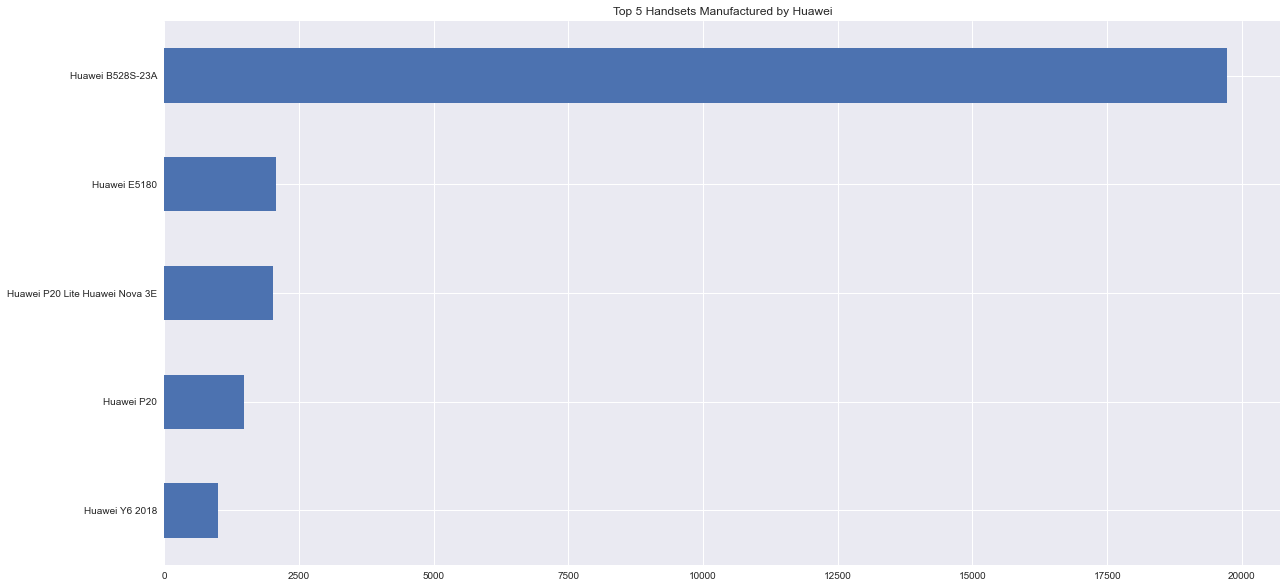

In [33]:
top_5_huawei_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Huawei", legend=False, xlabel="").invert_yaxis()

Looking at the insights, TellCo should start selling Apple, Samsung and Huawei manufactured handsets by partnering with them. The marketing team can then let customers know that they're selling these handsets in order to generate more revenue. 

### Grouping values to look into sessions per user
---

In [34]:
data_modified.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201448079117.0,33664962239.0,35521209507511.0,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200314458056.0,33760627129.0,35281510359387.0,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201402342131.0,33750343200.0,35356610164913.0,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201401415120.0,33699795932.0,35407009745539.0,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [35]:
user_agg = data_modified.groupby(["MSISDN/Number"], as_index=False).agg({'Bearer Id':'count', "Dur. (s)": "sum", "Total UL (Bytes)": "sum", "Total DL (Bytes)": "sum",  "Social Media UL (Bytes)": "sum", "Social Media DL (Bytes)": "sum", "Google UL (Bytes)": "sum", "Google DL (Bytes)": "sum", "Email UL (Bytes)": "sum", "Email DL (Bytes)": "sum", "Youtube UL (Bytes)": "sum", "Youtube DL (Bytes)": "sum", "Netflix UL (Bytes)": "sum", "Netflix DL (Bytes)": "sum", "Gaming UL (Bytes)": "sum", "Gaming DL (Bytes)": "sum", "Other UL (Bytes)": "sum", "Other DL (Bytes)": "sum"})
user_agg.reset_index(drop=True, inplace=True)

In [36]:
user_agg.shape

(106471, 19)

In [37]:
user_agg.rename(columns={"Bearer Id": "Session Count"}, inplace=True)

In [38]:
user_agg["Total Data Transferred"] = user_agg["Total UL (Bytes)"] + user_agg["Total DL (Bytes)"]

In [39]:
user_agg["Google Volume (Bytes)"] = user_agg["Google UL (Bytes)"] + user_agg["Google DL (Bytes)"]
user_agg["Netflix Volume (Bytes)"] = user_agg["Netflix UL (Bytes)"] + user_agg["Netflix DL (Bytes)"]
user_agg["Youtube Volume (Bytes)"] = user_agg["Youtube UL (Bytes)"] + user_agg["Youtube DL (Bytes)"]
user_agg["Gaming Volume (Bytes)"] = user_agg["Gaming UL (Bytes)"] + user_agg["Gaming DL (Bytes)"]
user_agg["Email Volume (Bytes)"] = user_agg["Email UL (Bytes)"] + user_agg["Email DL (Bytes)"]
user_agg["Social Media Volume (Bytes)"] = user_agg["Social Media UL (Bytes)"] + user_agg["Social Media DL (Bytes)"]
user_agg["Other Volume (Bytes)"] = user_agg["Other UL (Bytes)"] + user_agg["Other DL (Bytes)"]

In [40]:
# user_agg["Total Volume (Bytes)"] = user_agg["Google Volume (Bytes)"] + user_agg["Netflix Volume (Bytes)"] + user_agg["Youtube Volume (Bytes)"] + user_agg["Gaming Volume (Bytes)"] + user_agg["Other Volume (Bytes)"] + user_agg["Social Media Volume (Bytes)"] + user_agg["Email Volume (Bytes)"]

In [41]:
user_agg.shape

(106471, 27)

In [42]:
user_agg.head()

,MSISDN/Number,Session Count,Dur. (s),Total UL (Bytes),Total DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),Google UL (Bytes),Google DL (Bytes),Email UL (Bytes),...,Other UL (Bytes),Other DL (Bytes),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,3197020876596.0,1,877385.0,37295915.0,194828056.0,46628.0,668596.0,1865881.0,8572779.0,678492.0,...,2848373.0,467678100.0,232123971.0,10438660.0,26592300.0,11959905.0,178048738.0,1520771.0,715224.0,470526473.0
1,33601001722.0,1,116720.0,36053108.0,842637466.0,25631.0,2206504.0,1051882.0,3337123.0,493962.0,...,9473882.0,377096990.0,878690574.0,4389005.0,27180981.0,21624548.0,812458661.0,1331362.0,2232135.0,386570872.0
2,33601001754.0,1,181230.0,36104459.0,120755184.0,62017.0,2598548.0,1137166.0,4197697.0,478960.0,...,2152370.0,279557701.0,156859643.0,5334863.0,11221763.0,12432223.0,119750078.0,3307781.0,2660565.0,281710071.0
3,33601002511.0,1,134969.0,39306820.0,556659663.0,47619.0,3148004.0,99643.0,3343483.0,768880.0,...,6607171.0,495086501.0,595966483.0,3443126.0,19353900.0,21333570.0,538827713.0,3205380.0,3195623.0,501693672.0
4,33601007832.0,1,49878.0,20327526.0,401993172.0,28825.0,251469.0,3740728.0,5937765.0,106052.0,...,10031701.0,25248001.0,422320698.0,9678493.0,1942092.0,6977321.0,391126127.0,2284670.0,280294.0,35279702.0


In [43]:
volume_per_user = user_agg.drop(columns=[
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Social Media UL (Bytes)",
    "Social Media DL (Bytes)",
    "Google UL (Bytes)",
    "Google DL (Bytes)",
    "Email UL (Bytes)",
    "Email DL (Bytes)",
    "Youtube UL (Bytes)",
    "Youtube DL (Bytes)",
    "Netflix UL (Bytes)",
    "Netflix DL (Bytes)",
    "Gaming UL (Bytes)",
    "Gaming DL (Bytes)",
    "Other UL (Bytes)",
    "Other DL (Bytes)"
])

In [44]:
volume_per_user

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,3197020876596.0,1,877385.0,2.321240e+08,10438660.0,26592300.0,11959905.0,178048738.0,1520771.0,715224.0,4.705265e+08
1,33601001722.0,1,116720.0,8.786906e+08,4389005.0,27180981.0,21624548.0,812458661.0,1331362.0,2232135.0,3.865709e+08
2,33601001754.0,1,181230.0,1.568596e+08,5334863.0,11221763.0,12432223.0,119750078.0,3307781.0,2660565.0,2.817101e+08
3,33601002511.0,1,134969.0,5.959665e+08,3443126.0,19353900.0,21333570.0,538827713.0,3205380.0,3195623.0,5.016937e+08
4,33601007832.0,1,49878.0,4.223207e+08,9678493.0,1942092.0,6977321.0,391126127.0,2284670.0,280294.0,3.527970e+07
...,...,...,...,...,...,...,...,...,...,...,...
106466,33789967113.0,1,160461.0,2.081231e+08,9892882.0,30370302.0,28226479.0,134815919.0,3396607.0,1413370.0,4.081072e+08
106467,33789980299.0,2,210389.0,1.094693e+09,10246473.0,51950311.0,38012812.0,972344996.0,5315327.0,4250312.0,1.075140e+09
106468,33789996170.0,1,8810.0,7.146416e+08,7531269.0,14902538.0,26647843.0,660361359.0,1006915.0,300183.0,2.952828e+08
106469,33789997247.0,1,140988.0,4.803073e+08,5429705.0,8531060.0,19851572.0,437003292.0,2514097.0,498569.0,2.111151e+08


In [45]:
volume_per_user.to_csv(data_dir / "volume_per_user.csv", index=False)

In [46]:
volume_per_user.shape

(106471, 11)

In [47]:
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,3197020876596.0,1,877385.0,232123971.0,10438660.0,26592300.0,11959905.0,178048738.0,1520771.0,715224.0,470526473.0
1,33601001722.0,1,116720.0,878690574.0,4389005.0,27180981.0,21624548.0,812458661.0,1331362.0,2232135.0,386570872.0
2,33601001754.0,1,181230.0,156859643.0,5334863.0,11221763.0,12432223.0,119750078.0,3307781.0,2660565.0,281710071.0
3,33601002511.0,1,134969.0,595966483.0,3443126.0,19353900.0,21333570.0,538827713.0,3205380.0,3195623.0,501693672.0
4,33601007832.0,1,49878.0,422320698.0,9678493.0,1942092.0,6977321.0,391126127.0,2284670.0,280294.0,35279702.0


In [48]:
volume_per_user.describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
count,106471.000000,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05
mean,1.394802,1.465715e+05,6.915199e+08,1.089070e+07,3.156318e+07,3.158172e+07,6.002585e+08,3.151121e+06,2.549791e+06,5.989493e+08
std,0.806994,1.865627e+05,4.915267e+08,7.552384e+06,2.130939e+07,2.131551e+07,4.495611e+08,2.224563e+06,1.909685e+06,4.492890e+08
min,1.000000,7.142000e+03,3.324901e+07,4.033000e+04,1.845690e+05,7.890300e+04,3.063580e+05,1.817600e+04,1.563000e+03,1.490450e+05
25%,1.000000,7.239950e+04,3.587652e+08,5.945632e+06,1.857011e+07,1.863663e+07,2.882493e+08,1.675398e+06,1.211936e+06,2.858747e+08
50%,1.000000,1.031370e+05,6.183269e+08,9.592577e+06,2.673116e+07,2.681633e+07,5.426773e+08,2.801129e+06,2.305229e+06,5.401097e+08
75%,2.000000,1.727990e+05,8.578732e+08,1.322318e+07,3.800233e+07,3.795666e+07,7.777045e+08,3.848998e+06,3.309043e+06,7.756466e+08
max,18.000000,1.855375e+07,8.846226e+09,1.521919e+08,3.995191e+08,4.529588e+08,7.749432e+09,4.241878e+07,4.337478e+07,8.167878e+09


### Non graphical Univariate analysis
---

In [49]:
volume_per_user.columns.tolist()

['MSISDN/Number',
 'Session Count',
 'Dur. (s)',
 'Total Data Transferred',
 'Google Volume (Bytes)',
 'Netflix Volume (Bytes)',
 'Youtube Volume (Bytes)',
 'Gaming Volume (Bytes)',
 'Email Volume (Bytes)',
 'Social Media Volume (Bytes)',
 'Other Volume (Bytes)']

In [50]:
volume_per_user["Session Count"].describe()

count    106471.000000
mean          1.394802
std           0.806994
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          18.000000
Name: Session Count, dtype: float64

In [51]:
volume_per_user["Dur. (s)"].describe()

count    1.064710e+05
mean     1.465715e+05
std      1.865627e+05
min      7.142000e+03
25%      7.239950e+04
50%      1.031370e+05
75%      1.727990e+05
max      1.855375e+07
Name: Dur. (s), dtype: float64

In [52]:
volume_per_user["Total Data Transferred"].describe()

count    1.064710e+05
mean     6.915199e+08
std      4.915267e+08
min      3.324901e+07
25%      3.587652e+08
50%      6.183269e+08
75%      8.578732e+08
max      8.846226e+09
Name: Total Data Transferred, dtype: float64

In [53]:
volume_per_user["Google Volume (Bytes)"].describe()

count    1.064710e+05
mean     1.089070e+07
std      7.552384e+06
min      4.033000e+04
25%      5.945632e+06
50%      9.592577e+06
75%      1.322318e+07
max      1.521919e+08
Name: Google Volume (Bytes), dtype: float64

In [54]:
volume_per_user["Netflix Volume (Bytes)"].describe()

count    1.064710e+05
mean     3.156318e+07
std      2.130939e+07
min      1.845690e+05
25%      1.857011e+07
50%      2.673116e+07
75%      3.800233e+07
max      3.995191e+08
Name: Netflix Volume (Bytes), dtype: float64

In [55]:
volume_per_user["Youtube Volume (Bytes)"].describe()

count    1.064710e+05
mean     3.158172e+07
std      2.131551e+07
min      7.890300e+04
25%      1.863663e+07
50%      2.681633e+07
75%      3.795666e+07
max      4.529588e+08
Name: Youtube Volume (Bytes), dtype: float64

In [56]:
volume_per_user["Email Volume (Bytes)"].describe()

count    1.064710e+05
mean     3.151121e+06
std      2.224563e+06
min      1.817600e+04
25%      1.675398e+06
50%      2.801129e+06
75%      3.848998e+06
max      4.241878e+07
Name: Email Volume (Bytes), dtype: float64

In [57]:
volume_per_user["Gaming Volume (Bytes)"].describe()

count    1.064710e+05
mean     6.002585e+08
std      4.495611e+08
min      3.063580e+05
25%      2.882493e+08
50%      5.426773e+08
75%      7.777045e+08
max      7.749432e+09
Name: Gaming Volume (Bytes), dtype: float64

In [58]:
volume_per_user["Social Media Volume (Bytes)"].describe()

count    1.064710e+05
mean     2.549791e+06
std      1.909685e+06
min      1.563000e+03
25%      1.211936e+06
50%      2.305229e+06
75%      3.309043e+06
max      4.337478e+07
Name: Social Media Volume (Bytes), dtype: float64

In [59]:
volume_per_user["Other Volume (Bytes)"].describe()

count    1.064710e+05
mean     5.989493e+08
std      4.492890e+08
min      1.490450e+05
25%      2.858747e+08
50%      5.401097e+08
75%      7.756466e+08
max      8.167878e+09
Name: Other Volume (Bytes), dtype: float64

In [60]:
# volume_per_user["Total Volume (Bytes)"].describe()

In [61]:
volume_per_user.describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
count,106471.000000,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05,1.064710e+05
mean,1.394802,1.465715e+05,6.915199e+08,1.089070e+07,3.156318e+07,3.158172e+07,6.002585e+08,3.151121e+06,2.549791e+06,5.989493e+08
std,0.806994,1.865627e+05,4.915267e+08,7.552384e+06,2.130939e+07,2.131551e+07,4.495611e+08,2.224563e+06,1.909685e+06,4.492890e+08
min,1.000000,7.142000e+03,3.324901e+07,4.033000e+04,1.845690e+05,7.890300e+04,3.063580e+05,1.817600e+04,1.563000e+03,1.490450e+05
25%,1.000000,7.239950e+04,3.587652e+08,5.945632e+06,1.857011e+07,1.863663e+07,2.882493e+08,1.675398e+06,1.211936e+06,2.858747e+08
50%,1.000000,1.031370e+05,6.183269e+08,9.592577e+06,2.673116e+07,2.681633e+07,5.426773e+08,2.801129e+06,2.305229e+06,5.401097e+08
75%,2.000000,1.727990e+05,8.578732e+08,1.322318e+07,3.800233e+07,3.795666e+07,7.777045e+08,3.848998e+06,3.309043e+06,7.756466e+08
max,18.000000,1.855375e+07,8.846226e+09,1.521919e+08,3.995191e+08,4.529588e+08,7.749432e+09,4.241878e+07,4.337478e+07,8.167878e+09


### Graphical Univariate analysis
---

<AxesSubplot:>

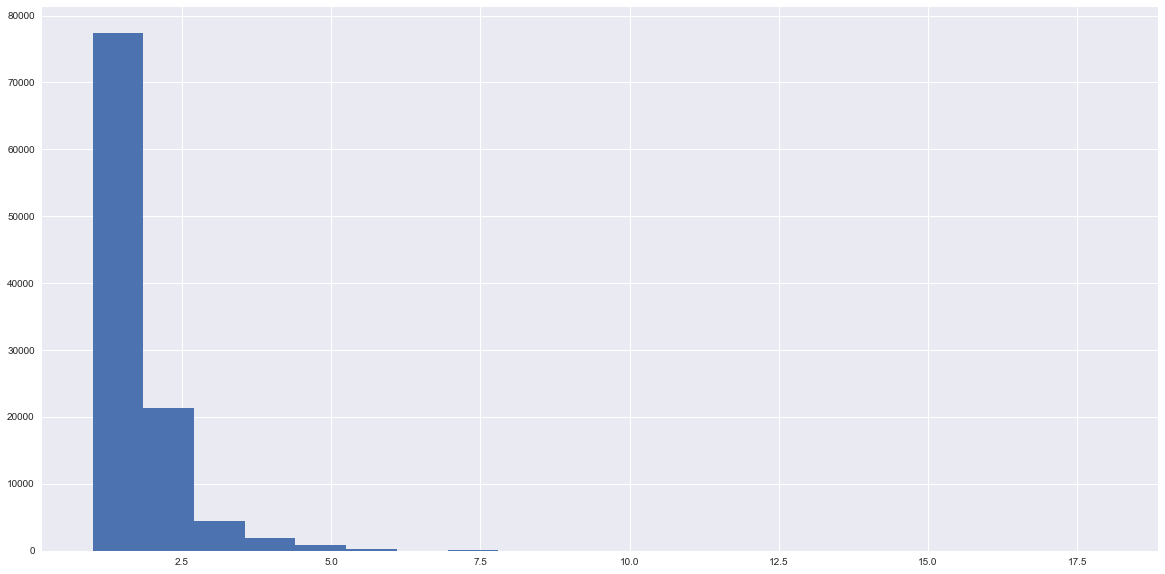

In [62]:
volume_per_user["Session Count"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

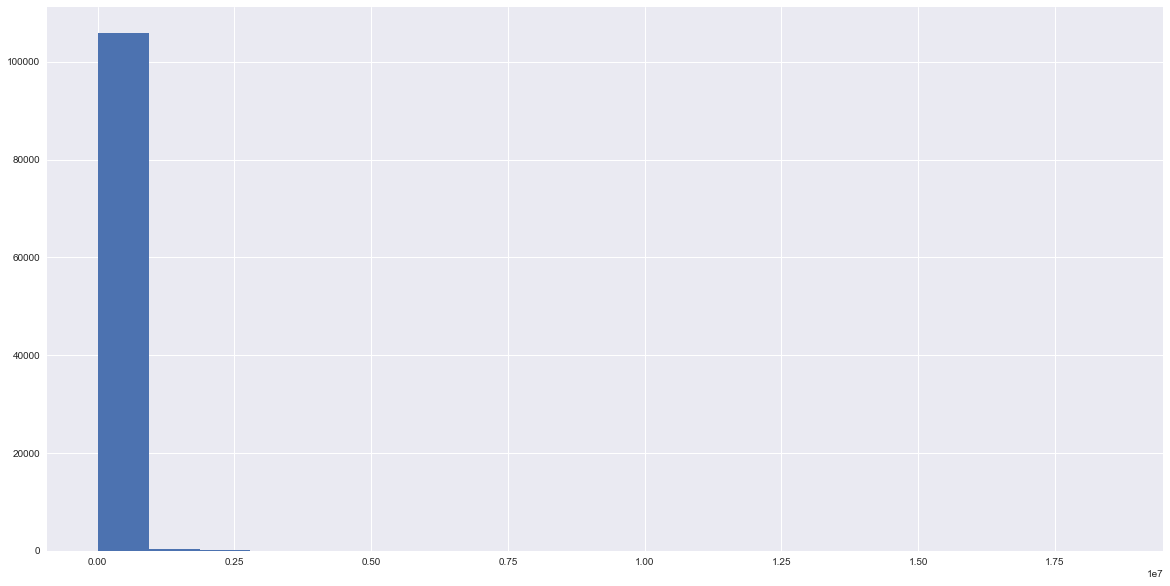

In [63]:
volume_per_user["Dur. (s)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

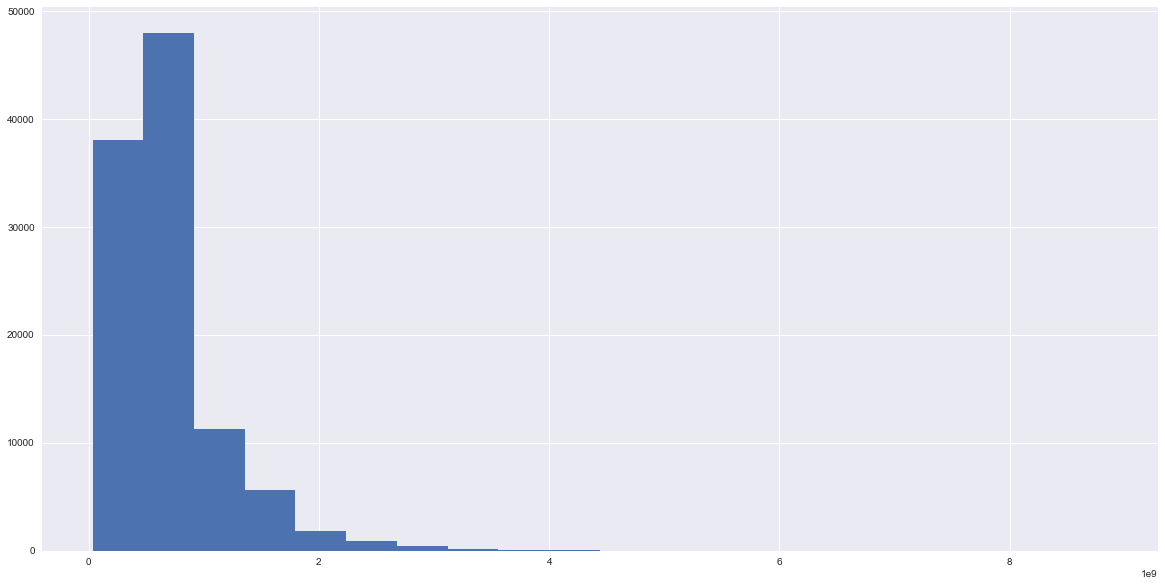

In [64]:
volume_per_user["Total Data Transferred"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

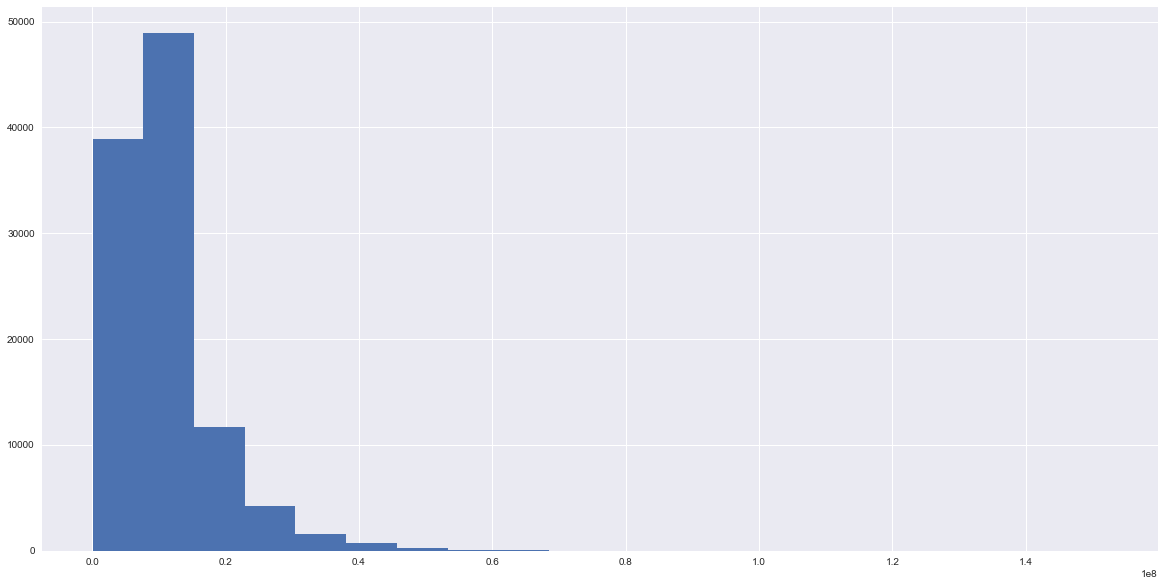

In [65]:
volume_per_user["Google Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

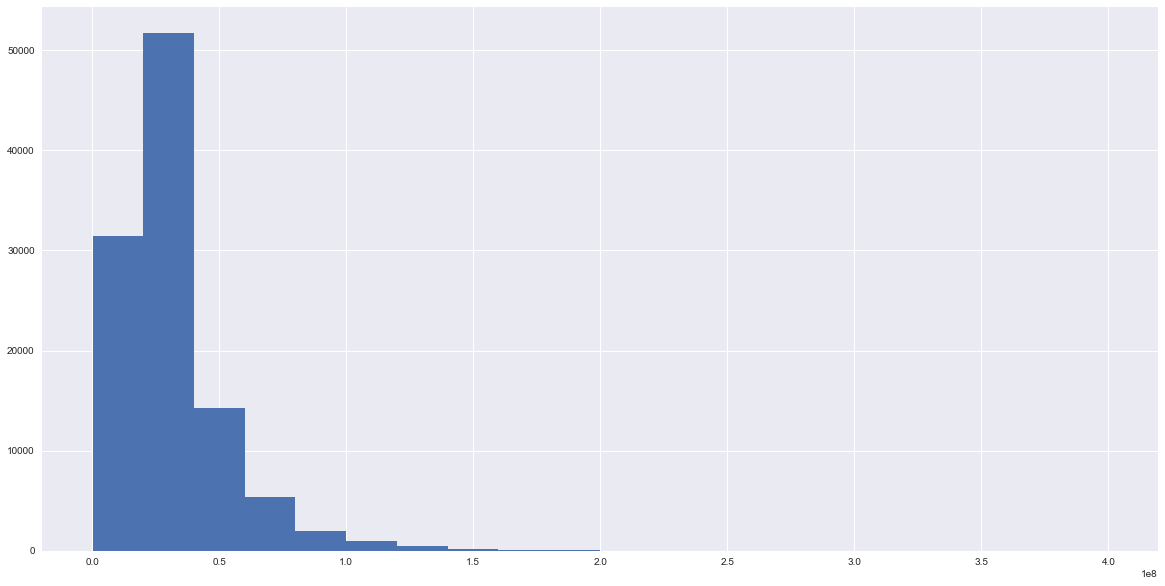

In [66]:
volume_per_user["Netflix Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

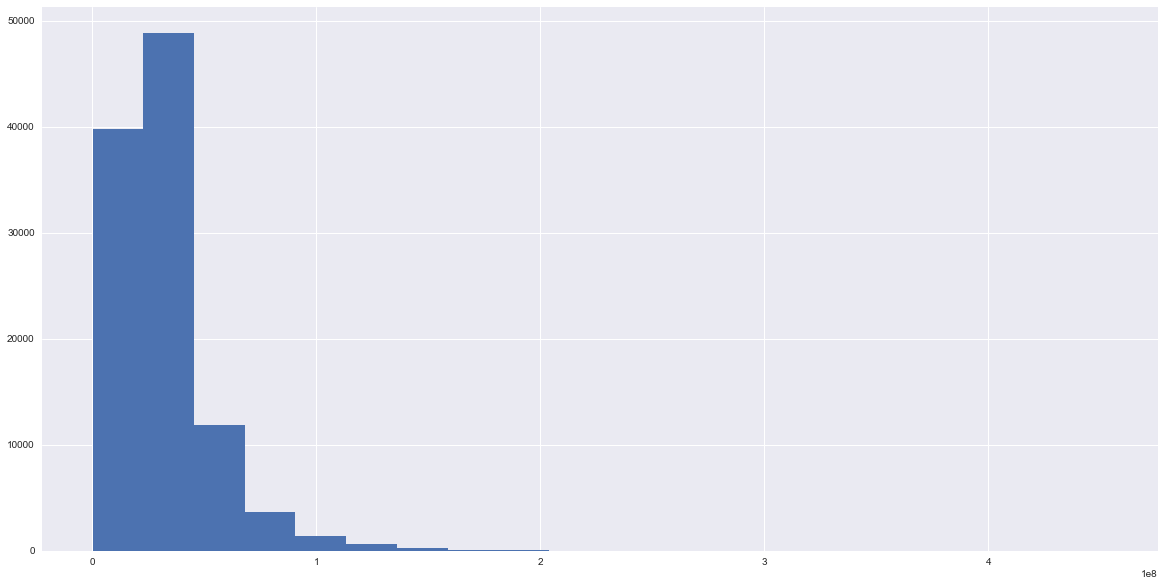

In [67]:
volume_per_user["Youtube Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

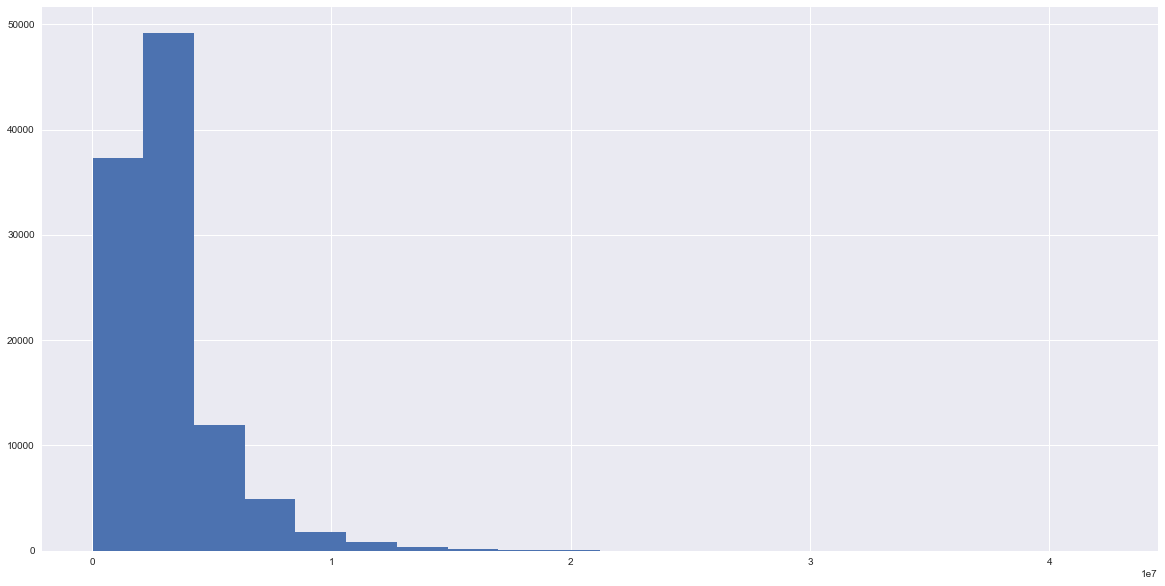

In [68]:
volume_per_user["Email Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

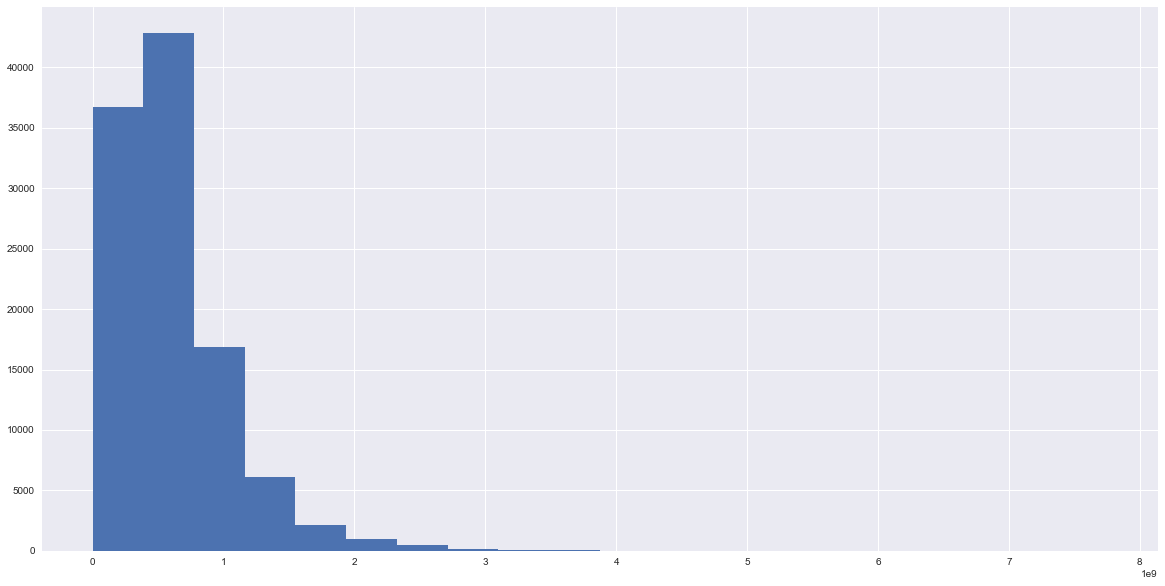

In [69]:
volume_per_user["Gaming Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

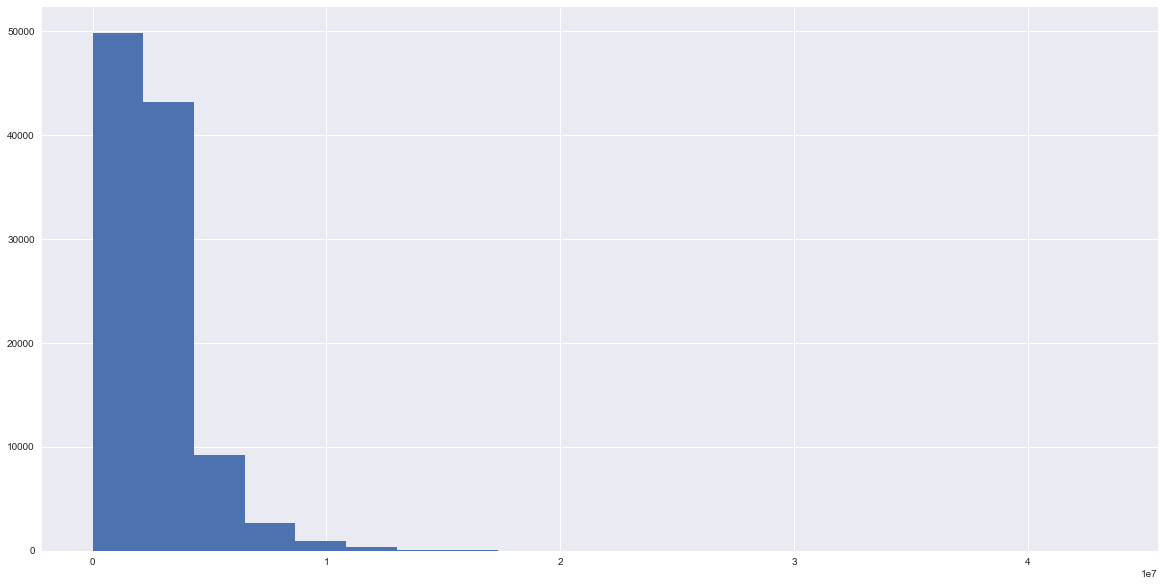

In [70]:
volume_per_user["Social Media Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

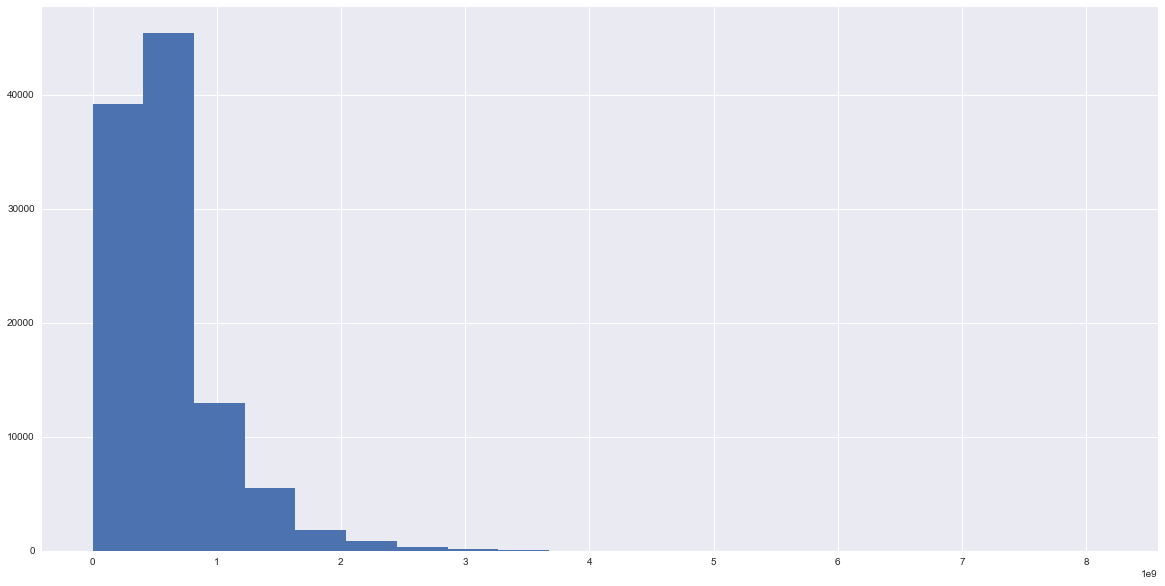

In [71]:
volume_per_user["Other Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Session Count'}>,
        <AxesSubplot:title={'center':'Dur. (s)'}>,
        <AxesSubplot:title={'center':'Total Data Transferred'}>],
       [<AxesSubplot:title={'center':'Google Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Netflix Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Youtube Volume (Bytes)'}>],
       [<AxesSubplot:title={'center':'Gaming Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Email Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Social Media Volume (Bytes)'}>],
       [<AxesSubplot:title={'center':'Other Volume (Bytes)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

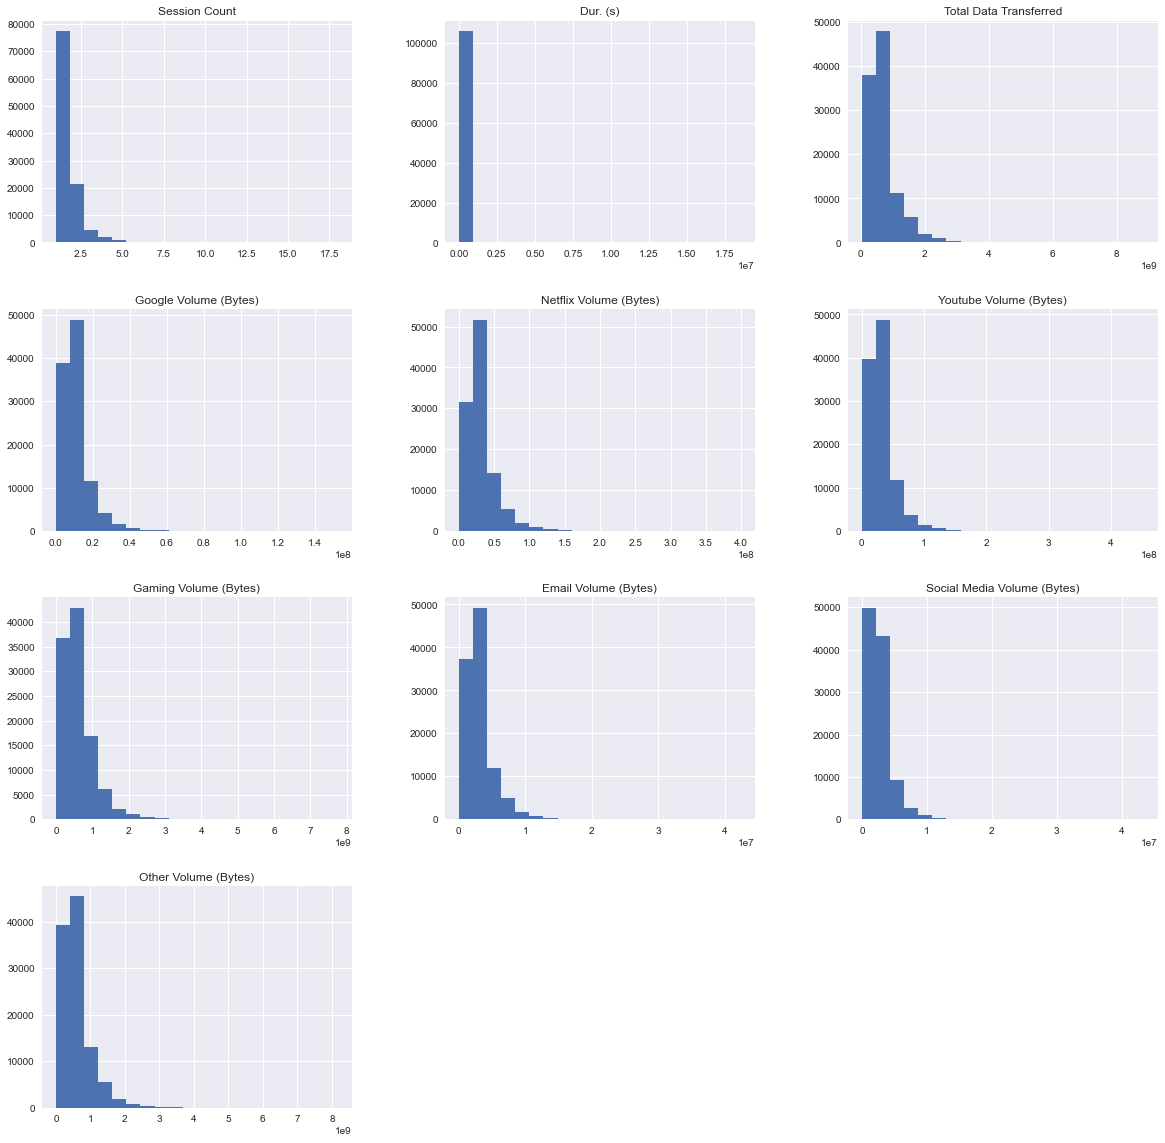

In [72]:
volume_per_user.hist(bins=20, figsize=(20, 20))

<AxesSubplot:>

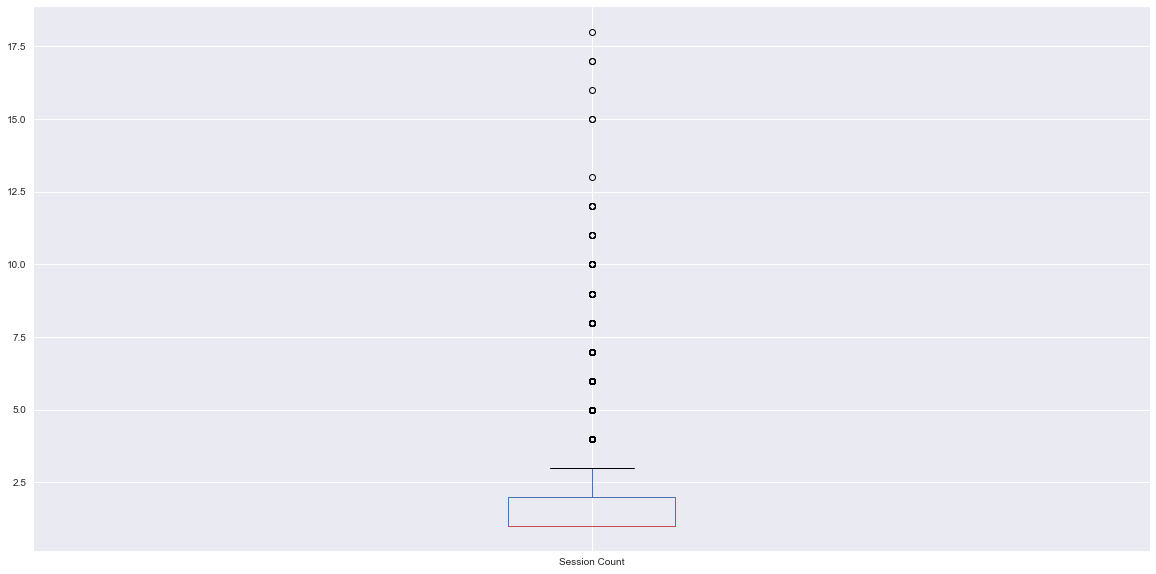

In [73]:
volume_per_user.boxplot(column=["Session Count"], figsize=(20, 10))

### Bivariate analysis
---

In [74]:
volume_per_user.corr()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
Session Count,1.000000,0.635745,0.808832,0.837265,0.858160,0.858583,0.766758,0.821877,0.768767,0.768540
Dur. (s),0.635745,1.000000,0.516191,0.533923,0.540650,0.551889,0.489468,0.527374,0.488301,0.486661
Total Data Transferred,0.808832,0.516191,1.000000,0.682134,0.705300,0.705372,0.997002,0.664134,0.624422,0.619392
Google Volume (Bytes),0.837265,0.533923,0.682134,1.000000,0.716565,0.718962,0.642442,0.688822,0.643505,0.643191
Netflix Volume (Bytes),0.858160,0.540650,0.705300,0.716565,1.000000,0.738730,0.657669,0.705898,0.660356,0.656256
Youtube Volume (Bytes),0.858583,0.551889,0.705372,0.718962,0.738730,1.000000,0.657735,0.705034,0.659871,0.660772
Gaming Volume (Bytes),0.766758,0.489468,0.997002,0.642442,0.657669,0.657735,1.000000,0.627846,0.590531,0.586746
Email Volume (Bytes),0.821877,0.527374,0.664134,0.688822,0.705898,0.705034,0.627846,1.000000,0.634498,0.631448
Social Media Volume (Bytes),0.768767,0.488301,0.624422,0.643505,0.660356,0.659871,0.590531,0.634498,1.000000,0.592088
Other Volume (Bytes),0.768540,0.486661,0.619392,0.643191,0.656256,0.660772,0.586746,0.631448,0.592088,1.000000


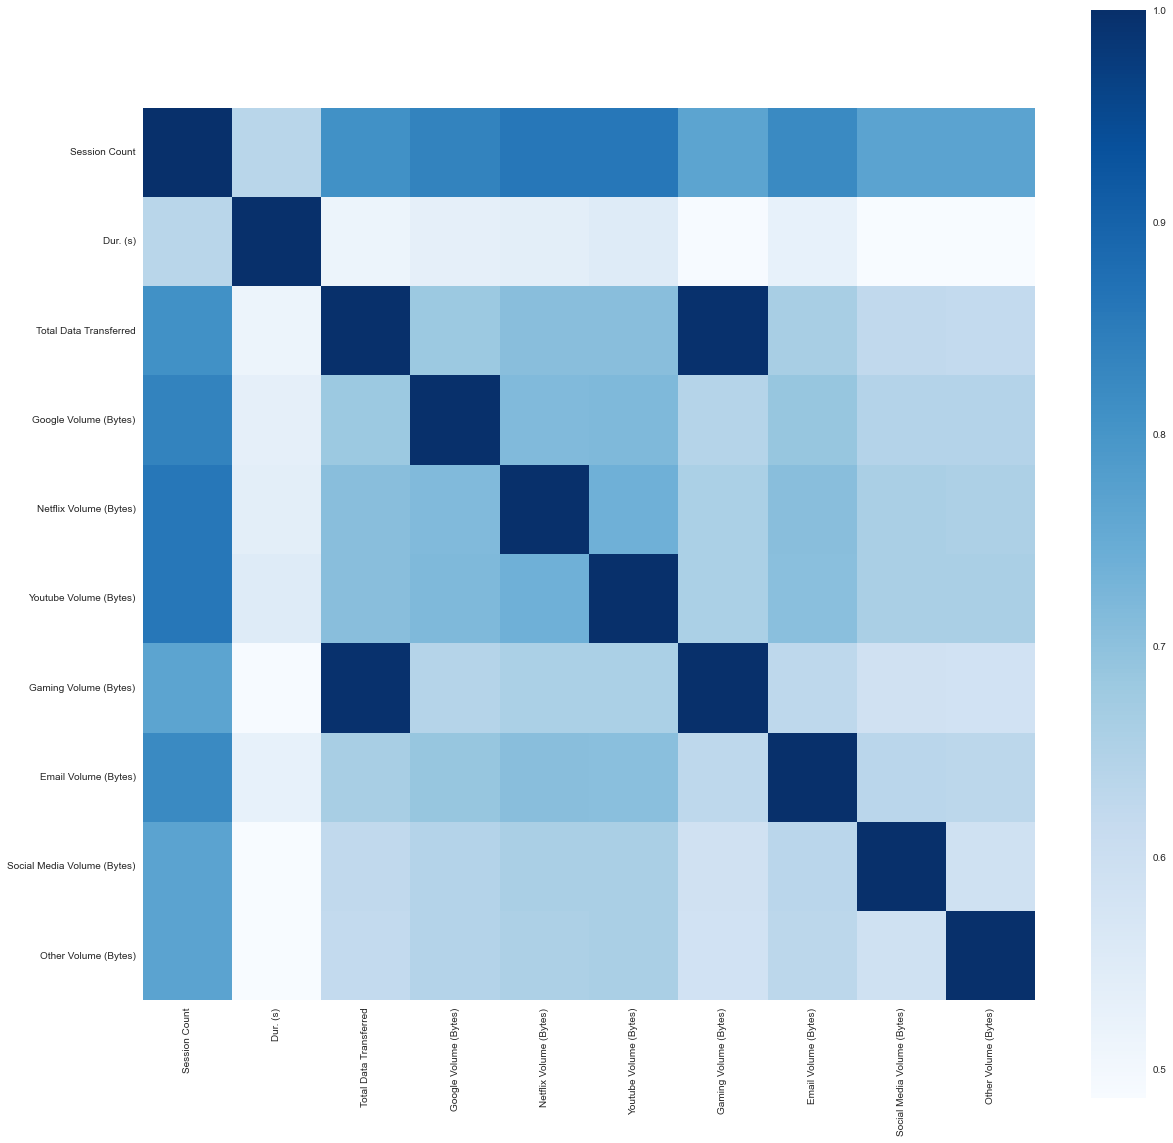

In [75]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(volume_per_user.corr(), cmap="Blues", square=True)

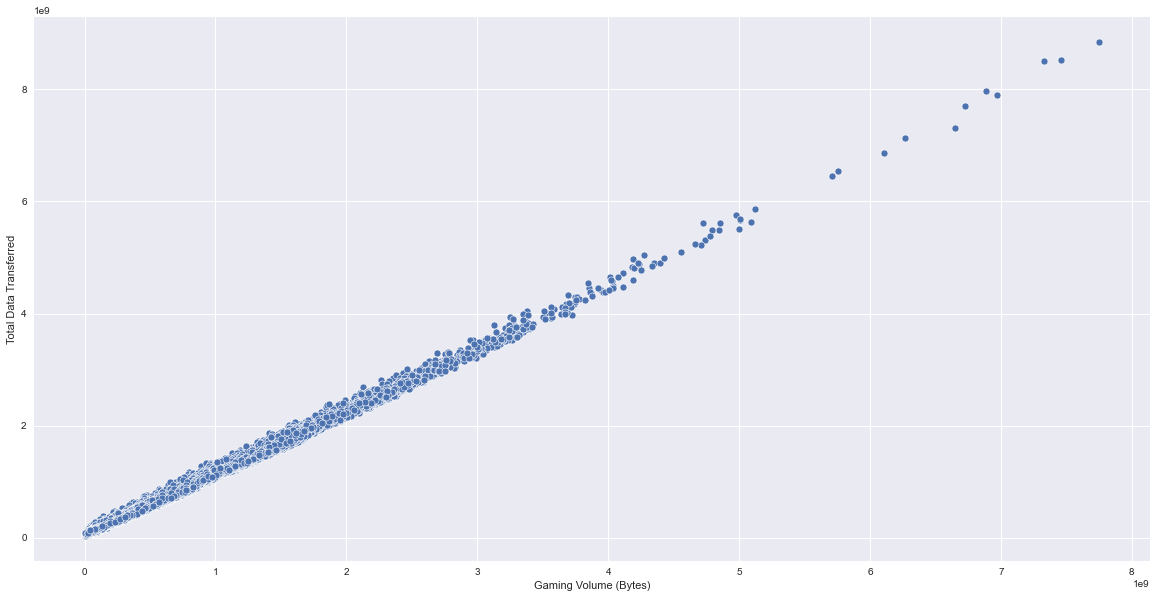

In [76]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.scatterplot(x= volume_per_user["Gaming Volume (Bytes)"], y= volume_per_user["Total Data Transferred"])

In [77]:
bivariate = volume_per_user.drop(columns=["MSISDN/Number", "Session Count", "Dur. (s)"])

In [78]:
bivariate.head()

,Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,232123971.0,10438660.0,26592300.0,11959905.0,178048738.0,1520771.0,715224.0,470526473.0
1,878690574.0,4389005.0,27180981.0,21624548.0,812458661.0,1331362.0,2232135.0,386570872.0
2,156859643.0,5334863.0,11221763.0,12432223.0,119750078.0,3307781.0,2660565.0,281710071.0
3,595966483.0,3443126.0,19353900.0,21333570.0,538827713.0,3205380.0,3195623.0,501693672.0
4,422320698.0,9678493.0,1942092.0,6977321.0,391126127.0,2284670.0,280294.0,35279702.0


<AxesSubplot:xlabel='Netflix Volume (Bytes)', ylabel='Total Data Transferred'>

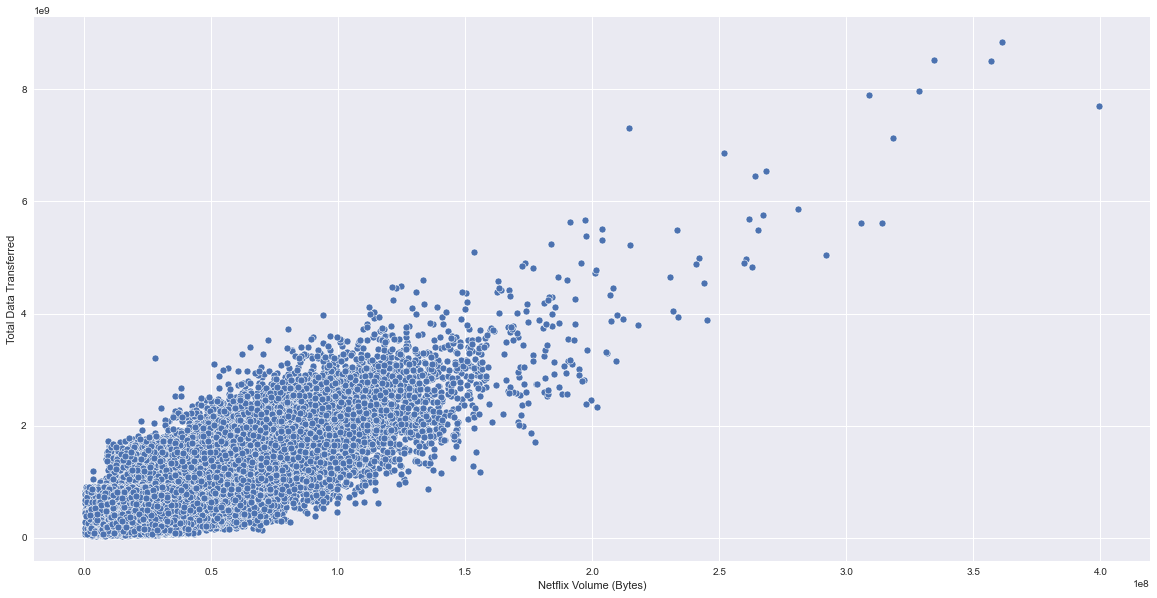

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.scatterplot(x=bivariate["Netflix Volume (Bytes)"], y=bivariate["Total Data Transferred"], ax=ax)

### Decile Rank
---

In [80]:
volume_per_user["Decile Rank"] = pd.qcut(volume_per_user["Dur. (s)"], 10, labels=False)
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Decile Rank
0,3197020876596.0,1,877385.0,232123971.0,10438660.0,26592300.0,11959905.0,178048738.0,1520771.0,715224.0,470526473.0,9
1,33601001722.0,1,116720.0,878690574.0,4389005.0,27180981.0,21624548.0,812458661.0,1331362.0,2232135.0,386570872.0,5
2,33601001754.0,1,181230.0,156859643.0,5334863.0,11221763.0,12432223.0,119750078.0,3307781.0,2660565.0,281710071.0,7
3,33601002511.0,1,134969.0,595966483.0,3443126.0,19353900.0,21333570.0,538827713.0,3205380.0,3195623.0,501693672.0,6
4,33601007832.0,1,49878.0,422320698.0,9678493.0,1942092.0,6977321.0,391126127.0,2284670.0,280294.0,35279702.0,1


In [81]:
# top 5 decile ranks
volume_per_user.nsmallest(columns=["Decile Rank"], n=5)

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Decile Rank
19,33601032846.0,1,21785.0,718452416.0,11768393.0,22990886.0,27463430.0,642930568.0,1711577.0,2251393.0,784538885.0,0
31,33601050219.0,1,29046.0,175382988.0,6537984.0,39801437.0,32612727.0,78201262.0,3406173.0,1335354.0,299239344.0,0
37,33601062786.0,1,10532.0,769716233.0,5032487.0,36026341.0,10683217.0,708855040.0,2104404.0,2186275.0,354876626.0,0
40,33601070798.0,1,12842.0,692598460.0,7475575.0,14777307.0,24903986.0,637463946.0,2968665.0,982717.0,299028176.0,0
62,33601121112.0,1,12921.0,406230342.0,13668175.0,9046771.0,29134624.0,335125533.0,2787889.0,2422990.0,205211582.0,0


In [82]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 0]["Total Data Transferred"].sum()

5426098958377.0

In [83]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 1]["Total Data Transferred"].sum()

6103710205566.0

In [84]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 2]["Total Data Transferred"].sum()

6463458931666.0

In [85]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 3]["Total Data Transferred"].sum()

5926922191229.0

In [86]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 4]["Total Data Transferred"].sum()

5252112256482.0

### PCA Analysis
---

In [87]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(n_components=2)

In [89]:
principal_components = pca.fit_transform(volume_per_user)

In [90]:
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

In [91]:
principal_df.head()

,principal component 1,principal component 2
0,3.151865e+12,-6.080635e+08
1,-1.155511e+10,1.471932e+08
2,-1.155511e+10,-7.839837e+08
3,-1.155511e+10,-1.451732e+08
4,-1.155511e+10,-5.666395e+08
